## Order pending time

This KPI measures the amount of orders during a month and a year.

In [1]:
# imports

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [53]:
%store -r final_merge

df = final_merge[["order_id", "order_date", "region", "state"]].copy()
df.head(3)

,order_id,order_date,region,state
0,CA-2017-100006,2017-09-07,East,New York
1,CA-2017-100090,2017-07-08,West,California
2,CA-2017-100293,2017-03-14,South,Florida


In [54]:
# extract year, month, dayofweek  information out of column order_date and build new column for each
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()
df["order_weekday"] = df["order_date"].dt.dayofweek
df["weekday_day"] = df["order_date"].dt.day_name()


df.head(2)

,order_id,order_date,region,state,order_year,order_month,month_name,order_weekday,weekday_day
0,CA-2017-100006,2017-09-07,East,New York,2017,9,September,3,Thursday
1,CA-2017-100090,2017-07-08,West,California,2017,7,July,5,Saturday


In [56]:
df["order_year"].unique()

array([2017, 2018, 2019, 2020], dtype=int32)

In [57]:
df_year_group = df.groupby("order_year")

df_2017 = df_year_group.get_group(2017)
df_2018 = df_year_group.get_group(2018)
df_2019 = df_year_group.get_group(2019)
df_2020 = df_year_group.get_group(2020)

#display(df_2017["month_name"].value_counts())
#display(df_2018["month_name"].value_counts())
#display(df_2019["month_name"].value_counts())
#display(df_2020["month_name"].value_counts())

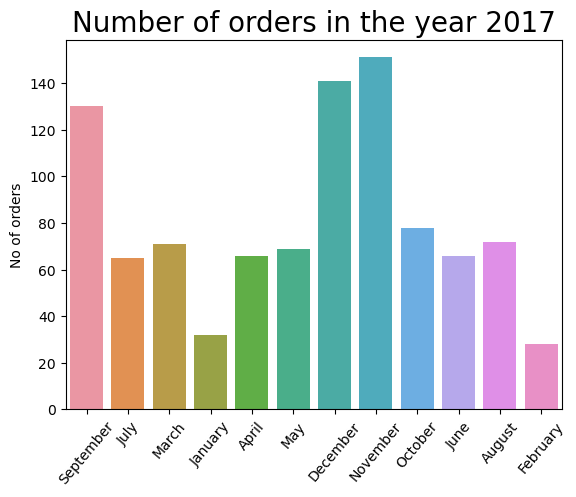

In [58]:
# Plot number of orders in the year 2017
year_2017 = sns.countplot(x=df_2017['month_name']) 
year_2017.tick_params(axis='x', rotation=50)
year_2017.set_ylabel("No of orders", fontsize = 10); 
year_2017.set(xlabel=None) 
year_2017.set_title('Number of orders in the year 2017', fontsize=20);

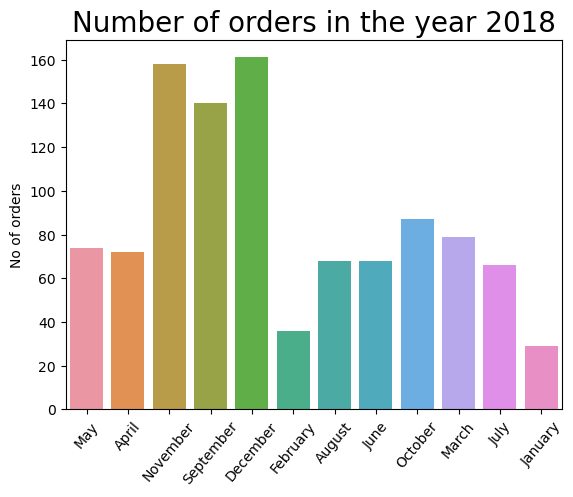

In [34]:
# Plot number of orders in the year 2018
year_2018 = sns.countplot(x=df_2018['month_name']) 
year_2018.tick_params(axis='x', rotation=50)
year_2018.set_ylabel("No of orders", fontsize = 10); 
year_2018.set(xlabel=None) 
year_2018.set_title('Number of orders in the year 2018', fontsize=20);

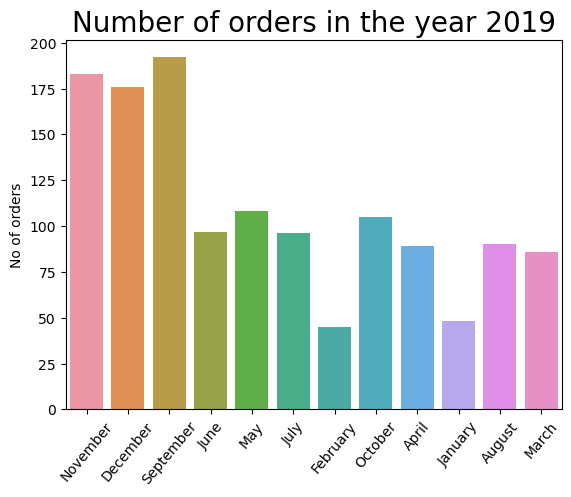

In [35]:
# Plot number of orders in the year 2019
year_2019 = sns.countplot(x=df_2019['month_name']) 
year_2019.tick_params(axis='x', rotation=50)
year_2019.set_ylabel("No of orders", fontsize = 10); 
year_2019.set(xlabel=None) 
year_2019.set_title('Number of orders in the year 2019', fontsize=20);

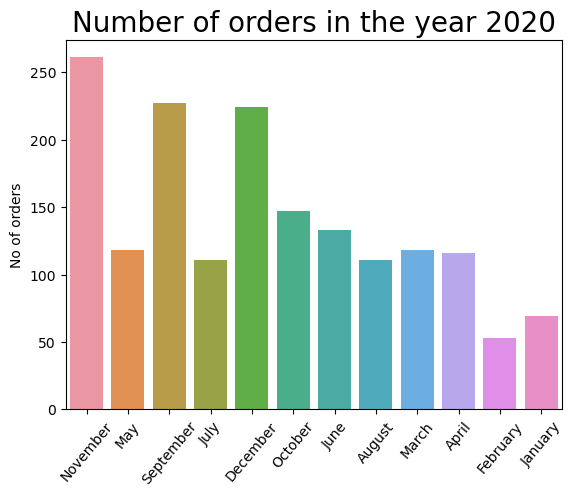

In [36]:
# Plot number of orders in the year 2020
year_2020 = sns.countplot(x=df_2020['month_name']) 
year_2020.tick_params(axis='x', rotation=50)
year_2020.set_ylabel("No of orders", fontsize = 10); 
year_2020.set(xlabel=None) 
year_2020.set_title('Number of orders in the year 2020', fontsize=20);

/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

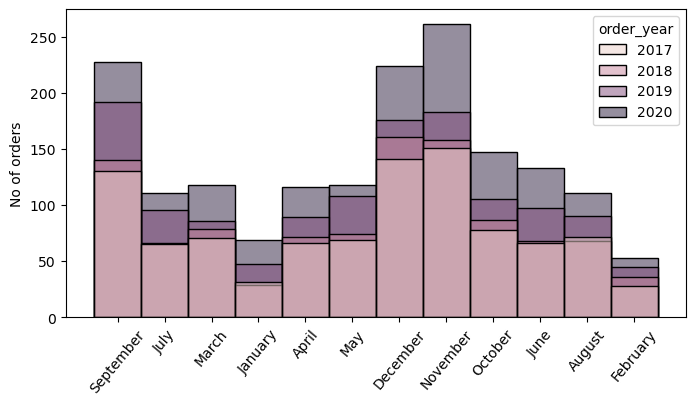

In [74]:
plt.figure(figsize=(8,4));
all_years = sns.histplot(x = 'month_name', hue = 'order_year', bins=20, data= df);

all_years.tick_params(axis='x', rotation=50)
all_years.set(xlabel=None) 
all_years.set_ylabel("No of orders", fontsize = 10); 

In [46]:
agg_dict = {"order_id": "count"}

group_year = df.groupby("order_year").agg(agg_dict).reset_index()

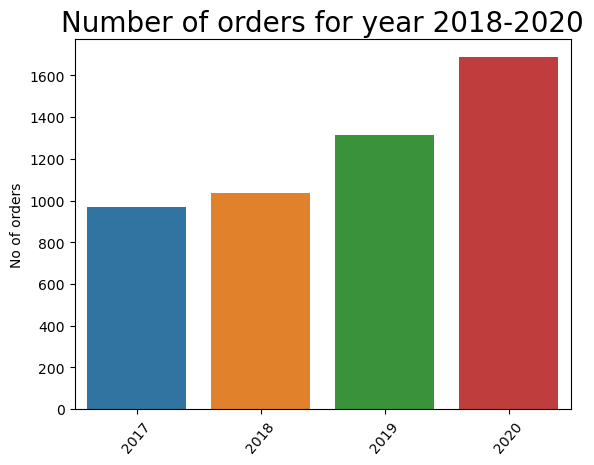

In [70]:
# Plot number of orders per year 2018-2020
per_year = sns.barplot(x=group_year['order_year'], y = group_year['order_id'])

per_year.tick_params(axis='x', rotation=50)
per_year.set_ylabel("No of orders", fontsize = 10); 
per_year.set(xlabel=None) 
per_year.set_title('Number of orders for year 2018-2020', fontsize=20);

#### Extra:

check the number of orders per state or area

/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/loca

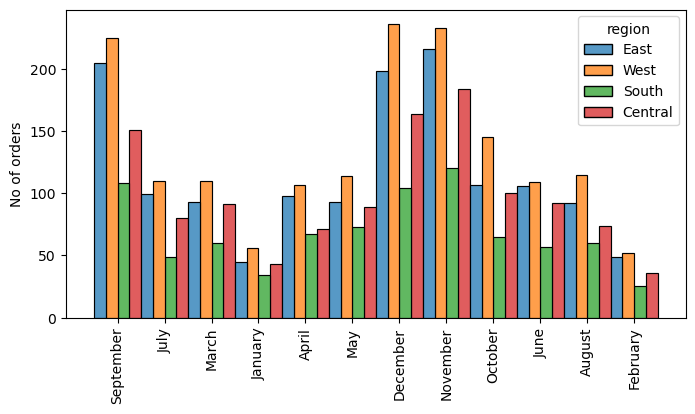

In [80]:
plt.figure(figsize=(8,4));
all_years = sns.histplot(x = 'month_name', hue = 'region', multiple="dodge", data= df);

all_years.tick_params(axis='x', rotation=90)
all_years.set(xlabel=None) 
all_years.set_ylabel("No of orders", fontsize = 10); 